### Dataset Test

In [1]:
from utils.data_utils import load_class_dataset, ToTensorTrans

In [7]:
cifar10_train_ds, cifar10_test_ds = load_class_dataset("CIFAR10", ToTensorTrans)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
cifar10_train_ds.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [10]:
cifar10_train_ds.class_to_idx['airplane']

0

In [ ]:
correct_count = {}

In [ ]:
for class_name in cifar10_train_ds.classes:
    class_label = cifar10_train_ds.class_to_idx[class_name]
    correct_count[class_name] += ((predicted == labels) & (labels == cat_label)).sum().item()

In [11]:

def zero_shot_with_each_class_acc(test_dataloader,model,zeroshot_weights,device):
    cat_correct, cat_total = 0,0
    correct_count = {}

    for class_name in test_dataloader.classes:
        correct_count[class_name] = 0
        
    with torch.no_grad():
        top1, top5, n = 0., 0., 0.
        tgt_top1 = 0.
        for i, (images, target) in enumerate(tqdm(test_dataloader)):
            images = images.to(device)
            target = target.to(device)

            image_features = model.encode_image(images)
                    
            image_features /= image_features.norm(dim=-1, keepdim=True)
            logits = 100. * image_features @ zeroshot_weights

            # measure misclassification accuracy
            acc1, acc5 = cal_accuracy(logits, target, topk=(1, 5))
            top1 += acc1
            top5 += acc5
            
            predicted = logits.argmax(1)

            for class_name in cifar10_train_ds.classes:
                class_label = cifar10_train_ds.class_to_idx[class_name]
                correct_count[class_name] += ((predicted == labels) & (labels == class_label)).sum().item()
                
            n += images.size(0)

    top1 = (top1 / n) * 100
    top5 = (top5 / n) * 100
 
    print(f"Top-1 accuracy: {top1}")
    print(f"Top-5 accuracy: {top5}")
    for key in correct_count.keys():
        print("The category {} : acc: {}%".format(key, correct_count[key] / 1000)
    return top1, top5

In [1]:
from utils.data_utils import ImageTextDatasetFromSupervisedDatasetPoison

In [2]:
import torch

In [3]:
noise_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/train_g_unlearn/cat_noise_ori_RN50.pt"

In [4]:
noise = torch.load(noise_path)

In [5]:
noise.shape

torch.Size([3386, 3, 224, 224])

In [6]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/data/laion-cat-with-index.json"

In [9]:
import json

In [10]:
json_data = json.load(open(json_path, "r"))

In [11]:
len(json_data)

3386

In [4]:
from torchvision.datasets import  MNIST, CIFAR10, CIFAR100, ImageNet, STL10, GTSRB
import os

In [6]:
unlearnable_train_dataset = STL10(root=os.path.expanduser("~/.cache"), download=True, split='train', transform=None)
test_dataset = STL10(root=os.path.expanduser("~/.cache"), download=True, split='test', transform=None)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
unlearnable_train_dataset.classes

['airplane',
 'bird',
 'car',
 'cat',
 'deer',
 'dog',
 'horse',
 'monkey',
 'ship',
 'truck']

In [10]:
unlearnable_train_dataset.labels

array([1, 5, 1, ..., 1, 7, 5], dtype=uint8)

In [8]:
unlearnable_train_dataset[0]

(<PIL.Image.Image image mode=RGB size=96x96>, 1)

In [13]:
unlearnable_train_dataset.data[0].shape

(3, 96, 96)

### Test new noise limit

In [26]:
import torch
import torch.nn as nn

In [27]:
noise = torch.randn((3,224,224))
epsilon = 16

In [28]:
activation_fn = nn.Tanh()

In [6]:
noise_act = activation_fn(noise)

In [10]:
new_noise= noise_act * epsilon

In [11]:
new_noise

tensor([[[ -8.0257,  -3.2066, -11.6865,  ...,   6.8231,  13.0621,   4.3871],
         [  2.7888, -10.5338,   9.2150,  ...,   6.1965,   4.4260, -13.4028],
         [ -1.1098, -14.0179,  -6.3653,  ...,  12.4304,   7.9795,  10.6626],
         ...,
         [ 15.7209,  10.1521,  -7.6196,  ...,   6.1915,   8.6546,  -7.0962],
         [-12.2375,  -6.6838,  -1.1699,  ...,  11.1405,   1.4089,  -8.1042],
         [  8.3487, -13.4967, -14.2351,  ...,  13.5251,   0.2648,  13.9210]],

        [[-12.5275,   3.6101, -12.4621,  ...,  13.0774,   0.2352, -14.1787],
         [  9.5216,  10.4093,   9.3194,  ..., -14.4976,   6.2690, -12.9974],
         [ -7.5865,  14.4080, -12.8142,  ...,  -8.0115,  12.0777,  -5.5887],
         ...,
         [ -8.7865,  15.3025,  10.7933,  ...,  14.7697, -14.6533, -12.9016],
         [ -3.6213,  -9.2304,  12.4672,  ...,  -5.3924,  -3.7736,  -0.6225],
         [ 12.7814,  -4.1572,  -8.3469,  ...,  14.5863,  14.3668,  13.3752]],

        [[ 11.5873, -15.5403,  15.5853,  ...

In [47]:
from utils.noise_utils import limit_noise_with_activation

In [48]:
output = torch.randn((32,3,224,224))
epsilon = 16

In [49]:
output.shape

torch.Size([32, 3, 224, 224])

In [50]:
activation_fn = nn.Tanh()
    
delta_im = activation_fn(output)
delta_im = delta_im * epsilon / 255. 

In [51]:
delta_im

tensor([[[[-0.0476, -0.0617,  0.0509,  ...,  0.0584, -0.0171, -0.0271],
          [-0.0358,  0.0038,  0.0273,  ...,  0.0471,  0.0458, -0.0432],
          [ 0.0563, -0.0184,  0.0241,  ..., -0.0419,  0.0160, -0.0037],
          ...,
          [-0.0175, -0.0020,  0.0139,  ..., -0.0071, -0.0386,  0.0436],
          [ 0.0152,  0.0282, -0.0531,  ...,  0.0155, -0.0299, -0.0050],
          [-0.0247, -0.0526,  0.0435,  ...,  0.0127, -0.0281, -0.0074]],

         [[-0.0115,  0.0241,  0.0328,  ..., -0.0532, -0.0517,  0.0431],
          [ 0.0048,  0.0517,  0.0326,  ..., -0.0096, -0.0388,  0.0145],
          [-0.0478, -0.0144, -0.0270,  ..., -0.0189,  0.0495, -0.0118],
          ...,
          [-0.0522, -0.0601, -0.0570,  ...,  0.0266,  0.0259,  0.0485],
          [ 0.0077, -0.0444,  0.0587,  ...,  0.0610,  0.0368,  0.0156],
          [ 0.0603,  0.0390,  0.0476,  ..., -0.0017, -0.0518, -0.0338]],

         [[ 0.0339, -0.0517, -0.0210,  ...,  0.0500,  0.0549,  0.0423],
          [-0.0139,  0.0411, -

In [43]:
import torch.nn.functional as F

In [52]:
delta_im1 = F.interpolate(delta_im, (224,224))

In [36]:
noise.shape

torch.Size([32, 3, 224, 224])

In [46]:
delta_im.shape

torch.Size([32, 3, 32, 32])

In [53]:
delta_im.eq(delta_im)

tensor([[[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ...

### 1.KORNIA使用

In [9]:
### reference：https://zhuanlan.zhihu.com/p/380701859

In [10]:
## official: https://kornia.readthedocs.io/en/latest/augmentation.container.html

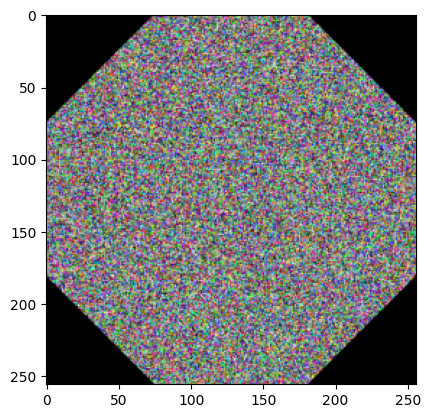

In [3]:
import kornia
import torch
import matplotlib.pyplot as plt
# 创建一个输入图像张量
input_tensor = torch.rand(1, 3, 256, 256)

# 对输入图像进行旋转变换
output_tensor = kornia.geometry.rotate(input_tensor, torch.tensor([45.0]))

# 显示变换后的图像
plt.imshow(output_tensor.squeeze().permute(1, 2, 0).numpy())
plt.show()

In [6]:
from kornia.augmentation.container import AugmentationSequential

In [46]:
import torch
from torchvision import transforms
from PIL import Image

image_path = "./temp1.png"
image = Image.open(image_path)

transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),           
])

image_tensor = transform(image)

image_tensor = image_tensor.unsqueeze(0)

print(image_tensor.shape)  


torch.Size([1, 3, 224, 224])


(224, 224, 3)


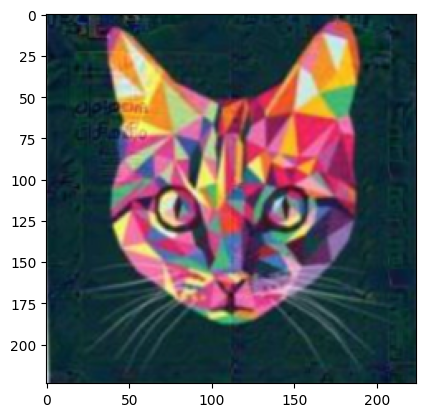

In [49]:
image_array = (image_tensor.squeeze(0)).permute(1, 2, 0).numpy()
print(image_array.shape)

plt.imshow(image_array)

In [143]:
aug_list = AugmentationSequential(
    kornia.augmentation.ColorJitter(0.1, 0.1, 0.1, 0.1, p=1.0),
    kornia.augmentation.RandomAffine(360, [0.1, 0.1], [0.7, 1.2], [30., 50.], p=0.4),
    kornia.augmentation.RandomPerspective(0.9, p=0.5),
    kornia.augmentation.RandomResizedCrop(image_array.shape[-3:-1], (1,1.4)),
    data_keys=["input"],
    same_on_batch=False,
    keepdim=True
)
# forward the operation
out_tensors = aug_list(image_tensor)
# # Inverse the operation
# out_tensor_inv = aug_list.inverse(*out_tensors)

In [146]:
from utils.data_utils import augmentations_kornia

In [155]:
out_tensors = augmentations_kornia(out_tensors)

(224, 224, 3)


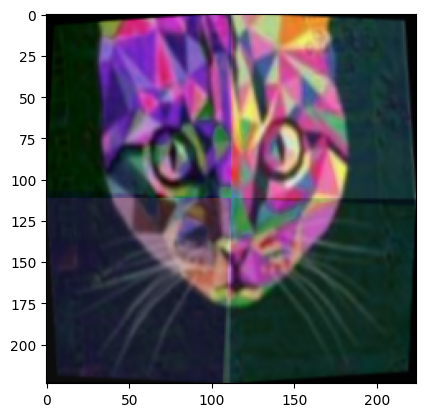

In [156]:
image_array = (out_tensors.squeeze(0)).permute(1, 2, 0).numpy()
print(image_array.shape)
plt.imshow(image_array)

In [11]:
import torch

In [12]:
cp_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_stage1_train_g_unlearn/gen_all/checkpoint/generator_best_epoch-214_loss-0.11523310208746033.pth"

In [13]:
checkpoint = torch.load(cp_path)

In [14]:
checkpoint.keys()

odict_keys(['module.conv_mask.0.weight', 'module.conv_mask.0.bias', 'module.conv_mask.1.weight', 'module.conv_mask.1.bias', 'module.conv_mask.1.running_mean', 'module.conv_mask.1.running_var', 'module.conv_mask.1.num_batches_tracked', 'module.conv_mask.3.weight', 'module.conv_mask.3.bias', 'module.fc.weight', 'module.fc.bias', 'module.block0.gamma', 'module.block0.c1.weight', 'module.block0.c1.bias', 'module.block0.c2.weight', 'module.block0.c2.bias', 'module.block0.affine0.batch_norm2d.running_mean', 'module.block0.affine0.batch_norm2d.running_var', 'module.block0.affine0.batch_norm2d.num_batches_tracked', 'module.block0.affine0.fc_gamma.linear1.weight', 'module.block0.affine0.fc_gamma.linear1.bias', 'module.block0.affine0.fc_gamma.linear2.weight', 'module.block0.affine0.fc_gamma.linear2.bias', 'module.block0.affine0.fc_beta.linear1.weight', 'module.block0.affine0.fc_beta.linear1.bias', 'module.block0.affine0.fc_beta.linear2.weight', 'module.block0.affine0.fc_beta.linear2.bias', 'modu

In [15]:
from models.model_gan_generator import NetG

In [16]:
text_embedding_dim = 512

reference: https://blog.csdn.net/Coco_W/article/details/129961935

In [19]:
generator = NetG(ngf=text_embedding_dim//8)
generator = generator.to('cuda:0')

generator.load_state_dict({k.replace('module.',''):v for k,v in checkpoint.items()})

<All keys matched successfully>

In [21]:
'module.' in list(checkpoint.keys())[0]

True

In [22]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/data/laion_cifar10.json"

In [23]:
import json

In [29]:
json_data = json.load(open(json_path, 'r', encoding='utf-8'))

In [30]:
json_data[0]

{'caption': '3d illustration of four engine commercial airplane isolated on white background',
 'image_path': '/remote-home/songtianwei/research/clip_train/laion_dataset/cifar10/airplane/00000/00000000005.jpg',
 'dataset': 'cifar10',
 'class': 'airplane',
 'index': 0}

### Collect json result

In [1]:
import os

In [2]:
folder_path_list = [
    "output/unlearn_stage3_test_clip",
    "output/unlearn_stage3_test_self_supervised",
    "output/unlearn_stage3_test_supervised"
]

In [3]:
def parse_json_data(json_record_dict):
    all_args = json_record_dict["args"]
    last_experiment_result = json_record_dict['experiment_result'][-1]
    return all_args, last_experiment_result

In [4]:
import os
import json

def read_json_files(folder_path):
    # 存储结果的列表
    results = []

    if isinstance(folder_path,str):
        all_path = [folder_path]
    elif isinstance(folder_path, list):
        all_path = folder_path
    else:
        raise("wrong input str")
    for the_folder_path in all_path:
        for root, dirs, files in os.walk(the_folder_path):
            for file_name in files:
                if file_name.endswith('.json'):
                    file_path = os.path.join(root, file_name)
                    print("loading experiment data from " + file_path)
                    
                    with open(file_path, 'r', encoding='utf-8') as f:
                        try:
                            json_data = json.load(f)
                            # here only the last result is needed
                            all_args, last_experiment_data = parse_json_data(json_data)
                            results.append((file_path, all_args, last_experiment_data))
                        except BaseException as e:
                            print(f"Error parsing JSON file '{file_path}': {e}")
    
    return results

In [5]:
all_result = read_json_files(folder_path_list)

loading experiment data from output/unlearn_stage3_test_clip/poisoned/myLaion_RN50/record_myLaion_poison.json
loading experiment data from output/unlearn_stage3_test_clip/poisoned/myLaion_ViT-B_16/record_myLaion_poison.json
loading experiment data from output/unlearn_stage3_test_clip/poisoned/myLaion_ViT-B_32/record_myLaion_poison.json
loading experiment data from output/unlearn_stage3_test_clip/poisoned/myLaion_RN101/record_myLaion_poison.json
loading experiment data from output/unlearn_stage3_test_clip/natural/myLaion_RN50/record_myLaion_natural.json
loading experiment data from output/unlearn_stage3_test_clip/natural/myLaion_ViT-B_16/record_myLaion_natural.json
loading experiment data from output/unlearn_stage3_test_clip/natural/myLaion_ViT-B_32/record_myLaion_natural.json
loading experiment data from output/unlearn_stage3_test_clip/natural/myLaion_RN101/record_myLaion_natural.json
loading experiment data from output/unlearn_stage3_test_self_supervised/poisoned/stl10/stage2/result.j

In [6]:
all_result[8]

('output/unlearn_stage3_test_self_supervised/poisoned/stl10/stage2/result.json',
 {'device': 'cuda:3',
  'dataset': 'stl10',
  'poisoned': True,
  'noise_path': './output/unlearn_stage2_generate_noise/ViT-B-16/stl10/noise_gen1_ViT-B-16_stl10_all.pt',
  'output_dir': 'output/unlearn_stage3_test_self_supervised/poisoned/stl10',
  'distributed': False,
  'stage': 'all',
  'pretrain_batch_size': 400,
  'finetune_batch_size': 400,
  'pretrain_epoch': 1000,
  'finetune_epoch': 200,
  'test_train_type': 'self_supervised',
  'stage1_path': 'output/unlearn_stage3_test_self_supervised/poisoned/stl10/stage1/',
  'stage2_path': 'output/unlearn_stage3_test_self_supervised/poisoned/stl10/stage2/'},
 {'epoch': 200,
  'train_acc': 0,
  'train_loss': 0,
  'test_acc': 0.723375,
  'test_acc_top1': 0.723375,
  'test_acc_top5': 0.98225,
  'test_loss': 0.8845239281654358,
  'test_class_acc': {'airplane': {'correct_num': 709,
    'total_num': 800,
    'correct_rate': 0.88625},
   'bird': {'correct_num': 593,

In [15]:
def transform_to_line_data(data):
    line_record = []
    # condition for column
    clip_finetune_needed_column_condition = ['poisoned', 'finetune_dataset', 'batch_size', 'clip_model', 'noise_path', 'test_train_type']
    clip_finetune_needed_column_value = [['zero-shot','top1'],['zero-shot','top5'], 'epoch']

    # supervised 
    supervised_need_column_condition = ['poisoned', 'dataset', 'noise_path', 'max_epoch', 'lr', 'pretrained', 'test_train_type'] 
    supervised_need_column_value = ['test_acc', 'test_loss']

    # self supervised
    self_supervised_need_column_condition = ['poisoned', 'dataset', 'pretrain_epoch', 'finetune_epoch', 'test_train_type']
    self_supervised_need_column_value = ['test_acc_top1', 'test_loss']

    def parse_column_value(data,needed_column_value):
        line_value = []
        for item in needed_column_value:  
            if isinstance(item, list):  
                key1, key2 = item  
                line_value.append(data[key1][key2])  
            else:    
                line_value.append(data[item])  
        return line_value

    def concat_header(condition):
        new_header = []
        for item in condition:
            if isinstance(item, list):
                new_header.append("-".join(item))
            else:
                new_header.append(item)
        return new_header
    
    finetune_clip_header = concat_header(clip_finetune_needed_column_condition + clip_finetune_needed_column_value)
    supervised_header = concat_header(supervised_need_column_condition + supervised_need_column_value)
    self_supervised_header = concat_header(self_supervised_need_column_condition + self_supervised_need_column_value)
    finetune_clip_data = []
    self_supervised_data = []
    supervised_data = []
    
    for exp_result_path, exp_result_args , exp_result_last_epoch in data:
        if exp_result_args['test_train_type'] == 'finetune_clip':
            print("parseing clip data from " + exp_result_path)
            line_condition = [exp_result_args[key] for key in clip_finetune_needed_column_condition]
            line_value = parse_column_value(exp_result_last_epoch, clip_finetune_needed_column_value)
            finetune_clip_data.append(line_condition + line_value)
        elif exp_result_args['test_train_type'] == 'supervised':
            print("parseing supervised data from " + exp_result_path)
            line_condition = [exp_result_args[key] for key in supervised_need_column_condition]
            line_value = parse_column_value(exp_result_last_epoch, supervised_need_column_value)
            supervised_data.append(line_condition + line_value)
        elif exp_result_args['test_train_type'] == 'self_supervised':
            print("parseing self-supervised data from " + exp_result_path)
            line_condition = [exp_result_args[key] for key in self_supervised_need_column_condition]
            line_value = parse_column_value(exp_result_last_epoch, self_supervised_need_column_value)
            self_supervised_data.append(line_condition + line_value)
        else:
            print("Erroring")

    return (finetune_clip_header,finetune_clip_data), (supervised_header,supervised_data), (self_supervised_header, self_supervised_data)

In [16]:
table1, table2, table3 = transform_to_line_data(all_result)

parseing clip data from output/unlearn_stage3_test_clip/poisoned/myLaion_RN50/record_myLaion_poison.json
parseing clip data from output/unlearn_stage3_test_clip/poisoned/myLaion_ViT-B_16/record_myLaion_poison.json
parseing clip data from output/unlearn_stage3_test_clip/poisoned/myLaion_ViT-B_32/record_myLaion_poison.json
parseing clip data from output/unlearn_stage3_test_clip/poisoned/myLaion_RN101/record_myLaion_poison.json
parseing clip data from output/unlearn_stage3_test_clip/natural/myLaion_RN50/record_myLaion_natural.json
parseing clip data from output/unlearn_stage3_test_clip/natural/myLaion_ViT-B_16/record_myLaion_natural.json
parseing clip data from output/unlearn_stage3_test_clip/natural/myLaion_ViT-B_32/record_myLaion_natural.json
parseing clip data from output/unlearn_stage3_test_clip/natural/myLaion_RN101/record_myLaion_natural.json
parseing self-supervised data from output/unlearn_stage3_test_self_supervised/poisoned/stl10/stage2/result.json
parseing self-supervised data 

In [23]:
table3

(['poisoned',
  'dataset',
  'pretrain_epoch',
  'finetune_epoch',
  'test_train_type',
  'test_acc_top1',
  'test_loss'],
 [[True, 'stl10', 1000, 200, 'self_supervised', 0.723375, 0.8845239281654358],
  [True, 'cifar10', 1000, 200, 'self_supervised', 0.8127, 0.2370670884847641],
  [False, 'stl10', 1000, 200, 'self_supervised', 0.754, 0.7696224451065063],
  [False,
   'cifar10',
   1000,
   200,
   'self_supervised',
   0.9245,
   0.01883712224662304]])

In [22]:
import pandas as pd

In [28]:
def gen_excel(table):
    headers = table[0]
    data = table[1]
      
    # 创建一个DataFrame  
    df = pd.DataFrame(data, columns=headers)  
      
    # 显示DataFrame  
    print(df)

    save_path = "./output/unlearn_stage4_collect_result"
    return df

In [29]:
df1,df2,df3 = gen_excel(table1), gen_excel(table2), gen_excel(table3)

   poisoned finetune_dataset  batch_size clip_model  \
0      True          myLaion         256       RN50   
1      True          myLaion         128   ViT-B/16   
2      True          myLaion         256   ViT-B/32   
3      True          myLaion         128      RN101   
4     False          myLaion         256       RN50   
5     False          myLaion         128   ViT-B/16   
6     False          myLaion         256   ViT-B/32   
7     False          myLaion         128      RN101   

                                          noise_path test_train_type  \
0  output/unlearn_stage2_generate_noise/both/nois...   finetune_clip   
1  output/unlearn_stage2_generate_noise/both/nois...   finetune_clip   
2  output/unlearn_stage2_generate_noise/both/nois...   finetune_clip   
3  output/unlearn_stage2_generate_noise/both/nois...   finetune_clip   
4  output/unlearn_stage2_generate_noise/both/nois...   finetune_clip   
5  output/unlearn_stage2_generate_noise/both/nois...   finetune_clip   


In [32]:
import pandas as pd  
  
with pd.ExcelWriter('./output/unlearn_stage4_collect_result/output.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='clip')  
    df2.to_excel(writer, sheet_name='self-supervised')  
    df3.to_excel(writer, sheet_name='supervised')  
  
print('DataFrames saved to different sheets in output.xlsx')

DataFrames saved to different sheets in output.xlsx


In [8]:
the_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_stage3_test_supervised/cifar10/natural/result.json"

In [14]:
with open(the_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [15]:
json_data

{'args': {'device': 'cuda:0',
  'dataset': 'cifar10',
  'poisoned': False,
  'noise_path': './output/unlearn_stage2_generate_noise/ViT-B-16/stl10/noise_gen1_ViT-B-16_stl10_all.pt',
  'output_dir': './output/unlearn_stage3_test_supervised/cifar10',
  'poison_class_name': 'all',
  'max_epoch': 40,
  'lr': 0.1,
  'pretrained': False,
  'fix_noise': False,
  'test': False,
  'test_folder': './output/unlearn_test_supervised/temp/',
  'test_train_type': 'supervised',
  'result_save_path': './output/unlearn_stage3_test_supervised/cifar10/natural/'},
 'experiment_result': [{'epoch': 0,
   'train_acc': 0.38201815324344024,
   'train_loss': 1.8217185808687795,
   'test_acc': 0.45168887867647056,
   'test_loss': 1.5126026749610901,
   'test_class_acc': {'airplane': {'correct_num': 343,
     'total_num': 1000,
     'correct_rate': 0.343},
    'automobile': {'correct_num': 687,
     'total_num': 1000,
     'correct_rate': 0.687},
    'bird': {'correct_num': 348, 'total_num': 1000, 'correct_rate': 0

In [17]:
data_parse_result = parse_json_data(json_data)

In [18]:
data_parse_result

({'device': 'cuda:0',
  'dataset': 'cifar10',
  'poisoned': False,
  'noise_path': './output/unlearn_stage2_generate_noise/ViT-B-16/stl10/noise_gen1_ViT-B-16_stl10_all.pt',
  'output_dir': './output/unlearn_stage3_test_supervised/cifar10',
  'poison_class_name': 'all',
  'max_epoch': 40,
  'lr': 0.1,
  'pretrained': False,
  'fix_noise': False,
  'test': False,
  'test_folder': './output/unlearn_test_supervised/temp/',
  'test_train_type': 'supervised',
  'result_save_path': './output/unlearn_stage3_test_supervised/cifar10/natural/'},
 {'epoch': 39,
  'train_acc': 1.0,
  'train_loss': 0.00022707712730839468,
  'test_acc': 0.7669577205882353,
  'test_loss': 1.3968063831329345,
  'test_class_acc': {'airplane': {'correct_num': 810,
    'total_num': 1000,
    'correct_rate': 0.81},
   'automobile': {'correct_num': 843,
    'total_num': 1000,
    'correct_rate': 0.843},
   'bird': {'correct_num': 692, 'total_num': 1000, 'correct_rate': 0.692},
   'cat': {'correct_num': 591, 'total_num': 100

In [58]:
json_natural_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_stage3_test_supervised/stl10/natural/result.json"

In [59]:
json_poison_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_stage3_test_supervised/stl10/poison/result.json"

In [60]:
def parse_json_and_draw_pic(json_path):
    import json
    json_data = json.load(open(json_path,'r'))
    x = [data_each_epoch['epoch'] for data_each_epoch in json_data['experiment_result']]
    y = [data_each_epoch['test_acc'] for data_each_epoch in json_data['experiment_result']]
    import matplotlib.pyplot as plt  
  
    # 绘制折线图  
    plt.plot(x, y)  
      
    # 添加标题和轴标签（可选）  
    plt.title('简单的折线图')  
    plt.xlabel('X轴')  
    plt.ylabel('Y轴')  
    print(x)
    print(y)
      
    # 显示图形  
    plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0.101171875, 0.1005859375, 0.226171875, 0.199462890625, 0.4122314453125, 0.381591796875, 0.4337646484375, 0.456005859375, 0.433447265625, 0.39189453125, 0.4465576171875, 0.4804931640625, 0.480908203125, 0.479443359375, 0.518798828125, 0.537109375, 0.5464111328125, 0.55107421875, 0.5507080078125, 0.55087890625, 0.5533447265625, 0.5543212890625, 0.554248046875, 0.5546875, 0.5539306640625, 0.5543212890625, 0.554931640625, 0.5548095703125, 0.554296875, 0.5544921875, 0.554248046875, 0.5538818359375, 0.5543212890625, 0.55615234375, 0.5544921875, 0.5556640625, 0.554736328125, 0.5551025390625, 0.55546875, 0.554736328125]


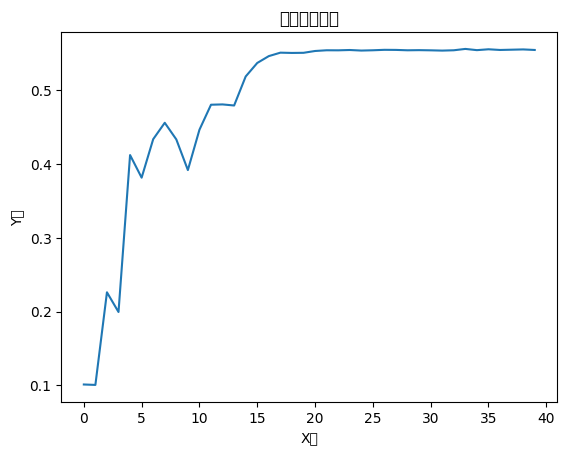

In [61]:
parse_json_and_draw_pic(json_natural_path)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[0.100634765625, 0.128369140625, 0.22626953125, 0.22470703125, 0.38671875, 0.4204833984375, 0.4253173828125, 0.41650390625, 0.3806396484375, 0.385009765625, 0.41953125, 0.4494873046875, 0.4433837890625, 0.4568115234375, 0.47861328125, 0.4782470703125, 0.49638671875, 0.5243408203125, 0.52216796875, 0.5187255859375, 0.518798828125, 0.5224853515625, 0.5236572265625, 0.52548828125, 0.525146484375, 0.525244140625, 0.5258056640625, 0.526171875, 0.5263671875, 0.52587890625, 0.52568359375, 0.5260009765625, 0.5269775390625, 0.5253173828125, 0.526123046875, 0.5259765625, 0.5258544921875, 0.52607421875, 0.52587890625, 0.525634765625]


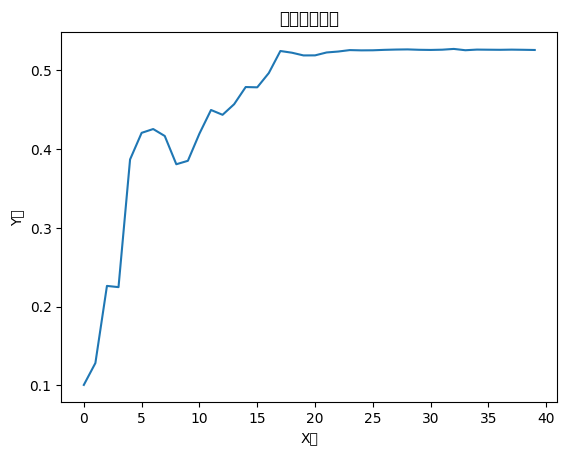

In [62]:
parse_json_and_draw_pic(json_poison_path)

### Noise relative 

In [8]:
import torch

In [11]:
noise_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_stage2_generate_noise/both/noise_gen2_46221-3-224-224_all_both.pt"

In [12]:
noise = torch.load(noise_path)

In [14]:
noise.shape

torch.Size([46221, 3, 224, 224])

In [15]:
noise

tensor([[[[-1.5269e-02, -2.4367e-02, -1.4926e-02,  ..., -3.4343e-02,
           -3.4922e-02, -4.2099e-02],
          [-3.0221e-02, -3.6445e-02, -7.9623e-03,  ..., -6.2745e-02,
           -5.1793e-02, -5.9976e-02],
          [-4.2938e-02, -5.0706e-02, -1.5696e-02,  ..., -6.2745e-02,
           -6.2658e-02, -6.2745e-02],
          ...,
          [-6.2745e-02, -6.2745e-02, -2.5581e-02,  ..., -3.2068e-02,
           -3.0359e-02, -3.3265e-02],
          [-6.2745e-02, -6.2745e-02, -4.4442e-02,  ..., -2.1810e-03,
           -5.0873e-03, -1.5955e-02],
          [-3.5166e-02, -1.2933e-02, -1.6986e-02,  ...,  1.3009e-05,
           -2.8942e-03, -1.4555e-02]],

         [[-2.2162e-03, -1.0597e-02, -2.8101e-02,  ..., -3.4679e-02,
           -4.6121e-02, -4.8041e-02],
          [ 7.8679e-03,  6.0303e-03, -1.6248e-02,  ..., -3.8502e-02,
           -4.2714e-02, -4.7043e-02],
          [-6.4051e-03, -1.0394e-02, -2.9128e-02,  ..., -4.5670e-02,
           -5.4196e-02, -5.6838e-02],
          ...,
     

In [ ]:
the_noise = noise['airplane'][0]

In [ ]:
noise['airplane'][0].eq(noise['airplane'][1])

In [ ]:
the_noise.shape

In [ ]:
perturb_noise = the_noise.mul(255).clamp_(-255, 255).permute(1, 2, 0).to('cpu').numpy()

In [47]:
perturb_noise

array([[[  2.511185  ,   2.9730372 , -16.        ],
        [  0.65399766,  -4.522805  , -16.        ],
        [  3.5541618 ,   0.69083977, -12.544646  ],
        ...,
        [ -3.7468762 ,  -2.1932256 ,  -8.175031  ],
        [  1.2631615 ,  -1.9321755 , -11.503108  ],
        [ -2.748802  ,  -5.0580106 , -16.        ]],

       [[ -3.6051815 ,   4.587749  , -16.        ],
        [ 16.        ,  16.        , -11.105751  ],
        [ 14.869178  ,   9.151557  ,  -8.84359   ],
        ...,
        [ -9.002402  ,   0.92972714, -11.09566   ],
        [ -0.94242686,   3.191733  , -12.041992  ],
        [-15.082665  ,  -5.4114013 , -16.        ]],

       [[ -3.9073355 , -15.671775  , -16.        ],
        [ 16.        ,  16.        , -11.615891  ],
        [ 16.        ,  16.        , -14.0445795 ],
        ...,
        [  0.76613253,   8.421839  , -10.694428  ],
        [  4.1034045 ,   3.9007883 , -13.062331  ],
        [ -4.5767317 ,  -2.8153834 , -16.        ]],

       ...,

      

In [6]:
from utils.data_utils import (
    load_poison_dataset, load_class_dataset
)

In [8]:
import torchvision.transforms as transforms

transform1 = transforms.Compose([
        # NOTE 这里强制改成32 * 32了！！！
        # transforms.Resize((32,32)),
        transforms.ToTensor()
    ])
    

In [9]:
poison_train_dataset, test_dataset = load_poison_dataset("stl10", noise, target_poison_class_name='all', train_transform=transform1, test_transform=transform1)        

Files already downloaded and verified
Files already downloaded and verified
addding noise to the dataset - all


In [17]:
len(poison_train_dataset)

5000

In [18]:
for data in poison_train_dataset:

    print(data)
    break

(tensor([[[0.5882, 0.5725, 0.5725,  ..., 0.6353, 0.6471, 0.6353],
         [0.5765, 0.6235, 0.5725,  ..., 0.6392, 0.6510, 0.6392],
         [0.6353, 0.6353, 0.6353,  ..., 0.6431, 0.6588, 0.6745],
         ...,
         [0.5098, 0.5804, 0.5216,  ..., 0.5647, 0.6510, 0.5529],
         [0.5255, 0.6706, 0.4078,  ..., 0.5294, 0.5961, 0.5373],
         [0.5294, 0.3804, 0.4549,  ..., 0.5412, 0.6392, 0.5412]],

        [[0.5922, 0.5608, 0.5882,  ..., 0.6235, 0.6275, 0.6235],
         [0.6235, 0.6235, 0.6235,  ..., 0.6588, 0.6745, 0.6235],
         [0.6235, 0.6235, 0.6235,  ..., 0.6824, 0.6667, 0.6549],
         ...,
         [0.4471, 0.4667, 0.4706,  ..., 0.5490, 0.6039, 0.4784],
         [0.4627, 0.5529, 0.3529,  ..., 0.5137, 0.5490, 0.4706],
         [0.4667, 0.3255, 0.4078,  ..., 0.4980, 0.5961, 0.5020]],

        [[0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
         [0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
         [0.4314, 0.4431, 0.4353,  ..., 0.4941, 0.4941, 0

In [19]:
import matplotlib.pyplot as plt

In [33]:
img1,tgt = poison_train_dataset[895]

In [34]:
tgt

6

In [35]:
img1

tensor([[[0.1765, 0.1529, 0.1922,  ..., 0.2235, 0.2314, 0.2157],
         [0.1765, 0.1686, 0.1608,  ..., 0.2000, 0.1961, 0.2275],
         [0.2706, 0.2235, 0.2000,  ..., 0.2510, 0.2706, 0.3294],
         ...,
         [0.8314, 0.8314, 0.8157,  ..., 0.8275, 0.8118, 0.2745],
         [0.8980, 0.8941, 0.8980,  ..., 0.7529, 0.7961, 0.4627],
         [0.8196, 0.8275, 0.8353,  ..., 0.7490, 0.8196, 0.7490]],

        [[0.3176, 0.3216, 0.3569,  ..., 0.3608, 0.3765, 0.3569],
         [0.3569, 0.3529, 0.3451,  ..., 0.3647, 0.3686, 0.4196],
         [0.3804, 0.3412, 0.3137,  ..., 0.4078, 0.4471, 0.4431],
         ...,
         [0.7490, 0.7569, 0.8078,  ..., 0.8471, 0.8039, 0.2196],
         [0.8196, 0.8157, 0.8235,  ..., 0.7294, 0.7529, 0.4118],
         [0.8039, 0.8118, 0.8196,  ..., 0.7294, 0.8039, 0.7216]],

        [[0.2392, 0.2118, 0.2471,  ..., 0.3333, 0.3412, 0.3098],
         [0.2392, 0.2353, 0.2314,  ..., 0.2980, 0.3176, 0.3333],
         [0.2549, 0.2392, 0.2039,  ..., 0.3333, 0.3608, 0.

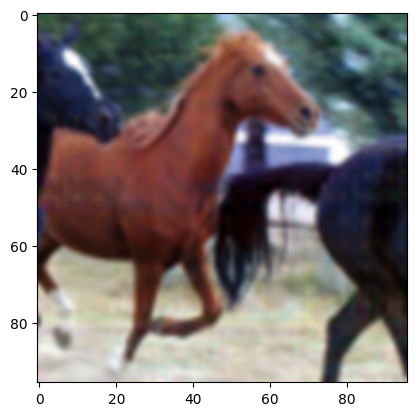

In [36]:
plt.imshow(transforms.ToPILImage()(img1), interpolation="bicubic")

### Test json poisoned dataset

In [8]:
import torch

In [11]:
noise_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_stage2_generate_noise/both/noise_gen2_46221-3-224-224_all_both.pt"

In [12]:
noise = torch.load(noise_path)

In [14]:
noise.shape

torch.Size([46221, 3, 224, 224])

In [15]:
noise

tensor([[[[-1.5269e-02, -2.4367e-02, -1.4926e-02,  ..., -3.4343e-02,
           -3.4922e-02, -4.2099e-02],
          [-3.0221e-02, -3.6445e-02, -7.9623e-03,  ..., -6.2745e-02,
           -5.1793e-02, -5.9976e-02],
          [-4.2938e-02, -5.0706e-02, -1.5696e-02,  ..., -6.2745e-02,
           -6.2658e-02, -6.2745e-02],
          ...,
          [-6.2745e-02, -6.2745e-02, -2.5581e-02,  ..., -3.2068e-02,
           -3.0359e-02, -3.3265e-02],
          [-6.2745e-02, -6.2745e-02, -4.4442e-02,  ..., -2.1810e-03,
           -5.0873e-03, -1.5955e-02],
          [-3.5166e-02, -1.2933e-02, -1.6986e-02,  ...,  1.3009e-05,
           -2.8942e-03, -1.4555e-02]],

         [[-2.2162e-03, -1.0597e-02, -2.8101e-02,  ..., -3.4679e-02,
           -4.6121e-02, -4.8041e-02],
          [ 7.8679e-03,  6.0303e-03, -1.6248e-02,  ..., -3.8502e-02,
           -4.2714e-02, -4.7043e-02],
          [-6.4051e-03, -1.0394e-02, -2.9128e-02,  ..., -4.5670e-02,
           -5.4196e-02, -5.6838e-02],
          ...,
     

In [16]:
from utils.data_utils import (
    jsonPoisonDataset, jsonDataset, create_loader, create_sampler, 
    ImageTextDatasetFromSupervisedDataset, ImageTextDatasetFromSupervisedDatasetPoison,
    ToTensorTrans,  To244TensorTrans, To288TensorTrans,
    create_simple_loader
)

In [17]:
json_all_path = "/remote-home/songtianwei/research/unlearn_multimodal/data/laion-all-with-index.json"

In [18]:
the_transform = To244TensorTrans

In [19]:
train_dataset = jsonPoisonDataset(json_all_path, noise_path,img_transform = the_transform, contain_index=False)

In [20]:
train_dataset[0]

(tensor([[[0.9847, 0.9756, 0.9851,  ..., 0.9657, 0.9651, 0.9579],
          [0.9698, 0.9636, 0.9920,  ..., 0.9373, 0.9482, 0.9400],
          [0.9571, 0.9493, 0.9843,  ..., 0.9373, 0.9373, 0.9373],
          ...,
          [0.9373, 0.9373, 0.9744,  ..., 0.9679, 0.9696, 0.9667],
          [0.9373, 0.9373, 0.9556,  ..., 0.9978, 0.9949, 0.9840],
          [0.9648, 0.9871, 0.9830,  ..., 1.0000, 0.9971, 0.9854]],
 
         [[0.9978, 0.9894, 0.9719,  ..., 0.9653, 0.9539, 0.9520],
          [1.0000, 1.0000, 0.9838,  ..., 0.9615, 0.9573, 0.9530],
          [0.9936, 0.9896, 0.9709,  ..., 0.9543, 0.9458, 0.9432],
          ...,
          [0.9569, 0.9373, 0.9566,  ..., 0.9719, 0.9559, 0.9564],
          [0.9673, 0.9614, 0.9373,  ..., 0.9579, 0.9444, 0.9431],
          [1.0000, 1.0000, 0.9490,  ..., 0.9850, 0.9758, 0.9721]],
 
         [[1.0000, 1.0000, 0.9902,  ..., 0.9888, 0.9780, 0.9757],
          [1.0000, 1.0000, 0.9962,  ..., 0.9784, 0.9749, 0.9649],
          [1.0000, 0.9985, 0.9883,  ...,

In [37]:
img1 = train_dataset[6345][0]

In [38]:
import matplotlib.pyplot as plt

In [39]:
from torchvision import transforms

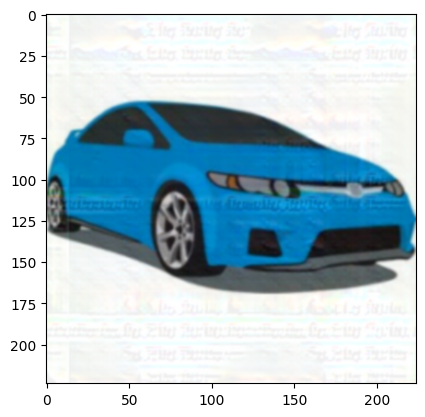

In [40]:
plt.imshow(transforms.ToPILImage()(img1), interpolation="bicubic")

### Visualize the image of poisoned cifar100

In [58]:
from utils.data_utils import load_poison_dataset

In [59]:
import torch

In [60]:
noise_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_sample-wise_stage2_generate_noise/B_16/cifar100/noise_gen1_ViT-B-16_cifar100_all.pt"

In [61]:
noise = torch.load(noise_path)

In [63]:
noise['apple']

tensor([[[[-6.2745e-02, -6.2745e-02, -6.2745e-02,  ..., -6.2745e-02,
           -6.2745e-02, -6.2745e-02],
          [-2.5762e-02, -6.2745e-02, -6.2745e-02,  ..., -6.2745e-02,
           -6.2745e-02, -6.2745e-02],
          [-6.2745e-02, -6.2745e-02, -6.2745e-02,  ..., -6.2745e-02,
           -6.2745e-02, -6.2745e-02],
          ...,
          [ 4.3720e-02, -6.2745e-02,  4.8667e-02,  ..., -1.3592e-02,
           -6.1658e-02, -6.2745e-02],
          [ 1.4824e-02, -6.2745e-02, -6.2745e-02,  ..., -6.2745e-02,
           -6.2745e-02, -6.2745e-02],
          [ 6.2745e-02, -6.2745e-02, -6.2745e-02,  ..., -6.2745e-02,
           -6.2745e-02, -6.2745e-02]],

         [[-6.2745e-02, -2.3734e-02, -4.1471e-02,  ..., -1.7549e-02,
           -1.5162e-02, -2.3082e-02],
          [ 1.4529e-03,  3.2723e-02,  1.4172e-02,  ...,  4.5908e-02,
            5.3875e-02,  5.2940e-02],
          [-4.1820e-02,  4.9110e-03, -3.1448e-02,  ...,  1.7628e-02,
            1.8480e-02,  1.0180e-02],
          ...,
     

In [64]:
poison_train_dataset, test_dataset = load_poison_dataset("cifar100", noise, 'all', None, None)

Files already downloaded and verified
Files already downloaded and verified
adding noise to the dataset - all


In [81]:
poison_train_dataset.class_to_idx

{'apple': 0,
 'aquarium_fish': 1,
 'baby': 2,
 'bear': 3,
 'beaver': 4,
 'bed': 5,
 'bee': 6,
 'beetle': 7,
 'bicycle': 8,
 'bottle': 9,
 'bowl': 10,
 'boy': 11,
 'bridge': 12,
 'bus': 13,
 'butterfly': 14,
 'camel': 15,
 'can': 16,
 'castle': 17,
 'caterpillar': 18,
 'cattle': 19,
 'chair': 20,
 'chimpanzee': 21,
 'clock': 22,
 'cloud': 23,
 'cockroach': 24,
 'couch': 25,
 'crab': 26,
 'crocodile': 27,
 'cup': 28,
 'dinosaur': 29,
 'dolphin': 30,
 'elephant': 31,
 'flatfish': 32,
 'forest': 33,
 'fox': 34,
 'girl': 35,
 'hamster': 36,
 'house': 37,
 'kangaroo': 38,
 'keyboard': 39,
 'lamp': 40,
 'lawn_mower': 41,
 'leopard': 42,
 'lion': 43,
 'lizard': 44,
 'lobster': 45,
 'man': 46,
 'maple_tree': 47,
 'motorcycle': 48,
 'mountain': 49,
 'mouse': 50,
 'mushroom': 51,
 'oak_tree': 52,
 'orange': 53,
 'orchid': 54,
 'otter': 55,
 'palm_tree': 56,
 'pear': 57,
 'pickup_truck': 58,
 'pine_tree': 59,
 'plain': 60,
 'plate': 61,
 'poppy': 62,
 'porcupine': 63,
 'possum': 64,
 'rabbit': 65,

In [65]:
for data in poison_train_dataset:
    print(data)
    break

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F5458427D30>, 19)


In [71]:
import matplotlib.pyplot as plt

In [84]:
sample = poison_train_dataset[777]
print(sample[0], sample[1])

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F5342717790> 75


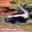

In [85]:
sample[0]

### Test noise of 224 image

In [3]:
import torch

In [4]:
import json

In [5]:
json_data = json.load(open("./data/laion-all-with-index.json",'r'))

In [6]:
json_data

[{'caption': '3d illustration of four engine commercial airplane isolated on white background',
  'image_path': '/remote-home/songtianwei/research/clip_train/laion_dataset/cifar10/airplane/00000/00000000005.jpg',
  'dataset': 'cifar10',
  'class': 'airplane',
  'index': 0},
 {'caption': "le garçon avec sa main court le modèle de l'avion dans le ciel image libre de droits",
  'image_path': '/remote-home/songtianwei/research/clip_train/laion_dataset/cifar10/airplane/00000/00000000014.jpg',
  'dataset': 'cifar10',
  'class': 'airplane',
  'index': 1},
 {'caption': 'image of vintage old toy airplane over old table - foto de stock',
  'image_path': '/remote-home/songtianwei/research/clip_train/laion_dataset/cifar10/airplane/00000/00000000002.jpg',
  'dataset': 'cifar10',
  'class': 'airplane',
  'index': 2},
 {'caption': 'женщина в вычерченном самолете мультимедиа стоковые изображения',
  'image_path': '/remote-home/songtianwei/research/clip_train/laion_dataset/cifar10/airplane/00000/000000

In [7]:
noise_list = torch.load("/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_stage2_generate_noise/RN50/noise_gen2_46221-224-224_all_RN50.pt")

In [8]:
import clip

In [9]:
model, preprocess = clip.load("RN50", "cuda:0", jit=False)

In [10]:
from torchvision import transforms

In [11]:
To244TensorTrans = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [12]:
from PIL import Image

In [13]:
sample = json_data[-20]

In [14]:
sample

{'caption': 'colorful dump truck toy. vector illustration',
 'image_path': '/remote-home/songtianwei/research/clip_train/laion_dataset/cifar10/truck/00000/00000003082.jpg',
 'dataset': 'cifar10',
 'class': 'truck',
 'index': 46201}

In [15]:
img = Image.open(sample['image_path'])
img = img.convert('RGB')

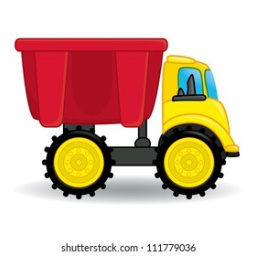

In [16]:
img

In [17]:
img_clean = To244TensorTrans(img)

In [18]:
import torch

In [19]:
the_noise_index = sample['index']

In [20]:
the_noise = noise_list[the_noise_index]
the_noise = the_noise.to(img_clean.device)
img_poisoned = torch.clamp(img_clean + the_noise, min=0, max=1)

In [21]:
the_noise

tensor([[[ 0.0627,  0.0627,  0.0627,  ...,  0.0627,  0.0627,  0.0627],
         [ 0.0627,  0.0627,  0.0627,  ...,  0.0627,  0.0627,  0.0627],
         [ 0.0627,  0.0627,  0.0627,  ...,  0.0627,  0.0627,  0.0627],
         ...,
         [ 0.0627,  0.0627,  0.0627,  ...,  0.0627,  0.0627,  0.0627],
         [ 0.0627,  0.0627,  0.0627,  ...,  0.0627,  0.0627,  0.0627],
         [ 0.0627,  0.0627,  0.0627,  ...,  0.0627,  0.0627,  0.0627]],

        [[ 0.0627,  0.0627,  0.0627,  ...,  0.0627,  0.0627,  0.0627],
         [ 0.0627,  0.0627,  0.0627,  ...,  0.0627,  0.0627,  0.0627],
         [ 0.0627,  0.0627,  0.0627,  ...,  0.0627,  0.0627,  0.0627],
         ...,
         [ 0.0627, -0.0627, -0.0627,  ...,  0.0627,  0.0627,  0.0627],
         [ 0.0627, -0.0627, -0.0627,  ...,  0.0627,  0.0627,  0.0627],
         [ 0.0627,  0.0625, -0.0003,  ...,  0.0627,  0.0627,  0.0627]],

        [[-0.0627, -0.0627, -0.0627,  ..., -0.0627, -0.0627, -0.0627],
         [-0.0627, -0.0627, -0.0627,  ..., -0

In [22]:
from utils.clip_util import clip_normalize

In [23]:
img_clean = clip_normalize(img_clean)
img_poisoned = clip_normalize(img_poisoned)

In [24]:
from torchvision.utils import save_image

In [25]:
image_natural_jpg = save_image(img_clean,"./clean.jpg")

In [26]:
image_poison_jpg = save_image(img_poisoned,"./poisoned.jpg")

In [27]:
text = sample['caption']

In [28]:
import torch
import clip
from PIL import Image

In [29]:
device = "cuda:0"

In [30]:
clean_img_feature = model.encode_image(img_clean.to(model.text_projection.device).unsqueeze(0))

In [31]:
clean_img_feature.shape

torch.Size([1, 1024])

In [32]:
clean_img_feature = clean_img_feature / clean_img_feature.norm(dim=1, keepdim=True)

In [33]:
poisoned_img_feature = model.encode_image(img_poisoned.to(model.text_projection.device).unsqueeze(0))

In [34]:
poisoned_img_feature = poisoned_img_feature / poisoned_img_feature.norm(dim=1, keepdim=True)

In [53]:
text_tokens = clip.tokenize(["A photo of a truck"]).to(device)

In [54]:
text_feature = model.encode_text(text_tokens)

In [55]:
text_feature.shape

torch.Size([1, 1024])

In [56]:
text_feature = text_feature / text_feature.norm(dim=1, keepdim=True)

In [57]:
cosValue_clean_img_text = torch.nn.functional.cosine_similarity(clean_img_feature, text_feature)

In [58]:
cosValue_poison_img_text = torch.nn.functional.cosine_similarity(poisoned_img_feature, text_feature)

In [59]:
print(cosValue_clean_img_text, cosValue_poison_img_text)  # poison img - text are more similar !!!

tensor([0.2190], device='cuda:0', dtype=torch.float16, grad_fn=<SumBackward1>) tensor([0.2297], device='cuda:0', dtype=torch.float16, grad_fn=<SumBackward1>)


In [51]:
from PIL import Image, ImageChops

def are_images_identical(image_path1, image_path2):
    # 打开两张图片
    img1 = Image.open(image_path1)
    img2 = Image.open(image_path2)

    # 比较图像大小
    if img1.size != img2.size:
        return False

    # 使用ImageChops模块比较两张图像
    diff = ImageChops.difference(img1, img2)

    # 获取差异图像中的所有像素
    bbox = diff.getbbox()
    
    # 如果差异图像中没有任何非零值的像素，则图像完全相同
    return bbox

# 示例图片路径
image_path1 = 'clean.jpg'
image_path2 = 'clean.jpg'

# 调用函数比较图像
result = are_images_identical(image_path1, image_path2)

# 输出结果
if result is None:
    print("The images are identical.")
else:
    print("The images are not identical.")


The images are identical.


In [52]:
result

### COCO Dataset Test

In [10]:
coco_json_path = "/data/projects/punim0619/datasets/coco2017/annotations/annotations/captions_train2017.json"

In [11]:
import json

In [12]:
json_data = json.load(open(coco_json_path,'r'))

In [13]:
json_data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations'])

In [16]:
json_data['images'][0]

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [23]:
json_data['annotations']

[{'image_id': 203564,
  'id': 37,
  'caption': 'A bicycle replica with a clock as the front wheel.'},
 {'image_id': 322141,
  'id': 49,
  'caption': 'A room with blue walls and a white sink and door.'},
 {'image_id': 16977,
  'id': 89,
  'caption': 'A car that seems to be parked illegally behind a legally parked car'},
 {'image_id': 106140,
  'id': 98,
  'caption': 'A large passenger airplane flying through the air.'},
 {'image_id': 106140,
  'id': 101,
  'caption': 'There is a GOL plane taking off in a partly cloudy sky.'},
 {'image_id': 322141,
  'id': 109,
  'caption': 'Blue and white color scheme in a small bathroom.'},
 {'image_id': 322141,
  'id': 121,
  'caption': 'This is a blue and white bathroom with a wall sink and a lifesaver on the wall.'},
 {'image_id': 322141,
  'id': 163,
  'caption': 'A blue boat themed bathroom with a life preserver on the wall'},
 {'image_id': 203564, 'id': 181, 'caption': 'The bike has a clock as a tire.'},
 {'image_id': 16977,
  'id': 185,
  'capti

In [18]:
image_id_to_caption_dict = {}

In [24]:
for data in json_data['annotations']:
    image_id_to_caption_dict[data['image_id']] = data['caption']

In [25]:
len(image_id_to_caption_dict)

118288

In [27]:
image_id_to_caption_dict[391895]

'A man in a red shirt and a red hat is on a motorcycle on a hill side.'

### Test CLIP

In [1]:
import torch
import clip
from PIL import Image

In [2]:
model, tokenizer = clip.load('RN50', 'cpu')

In [3]:
model.initialize_parameters()

In [7]:
model.text_projection.shape

torch.Size([512, 1024])

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

image = preprocess(Image.open("CLIP.png")).unsqueeze(0).to(device)
text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

NameError: name 'preprocess' is not defined

In [ ]:
model

In [ ]:
clip_one_layer_natural_myLaion_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_stage3_test_clip_attempt_adapter/from_pretrain/natural/myLaion_ViT-B_16/record_myLaion_natural.json"

In [20]:
clean_res_acc, clean_epoch = get_exp_column_value(clip_one_layer_natural_myLaion_path)

In [21]:
clean_res_acc

[90.85,
 90.86,
 90.88000000000001,
 90.88000000000001,
 90.85,
 90.85,
 90.85,
 90.86,
 90.84,
 90.79,
 90.75,
 90.68,
 90.64999999999999,
 90.64999999999999,
 90.64,
 90.57,
 90.51,
 90.49000000000001,
 90.51,
 90.47,
 90.42999999999999,
 90.41]

In [22]:
clip_poison_one_layer_poison_myLaion_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_stage3_test_clip_attempt_adapter/from_pretrain/poisoned/noise_of_myLaion_classWise/myLaion_ViT-B_16/record_myLaion_poison.json"

In [23]:
poison_res_acc, poison_epoch = get_exp_column_value(clip_poison_one_layer_poison_myLaion_path)

In [24]:
poison_res_acc

[90.85,
 90.88000000000001,
 90.88000000000001,
 90.88000000000001,
 90.88000000000001,
 90.88000000000001,
 90.88000000000001,
 90.88000000000001,
 90.88000000000001,
 90.88000000000001,
 90.88000000000001,
 90.9,
 90.92,
 90.92,
 90.92,
 90.91,
 90.91,
 90.92,
 90.99000000000001,
 91.05,
 90.98,
 91.0,
 91.01,
 91.03,
 91.06]

### Paper part